**Download temperature data from below link https://www.kaggle.com/venky73/temperatures-of-india?select=temperatures.csv**\
**This data consists of temperatures of INDIA averaging the temperatures of all places month wise. Temperatures values are recorded**\
**in CELSIUS**\

**a. Apply Linear Regression using suitable library function and predict the Month-wise temperature.**\
**b. Assess the performance of regression models using MSE, MAE and R-Square metrics**\
**c. Visualize simple regression model.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt;
from sklearn import metrics,linear_model,model_selection
import math

In [2]:
df = pd.read_csv("temperatures.csv")
df

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
0,1901,22.40,24.14,29.07,31.91,33.41,33.18,31.21,30.39,30.47,29.97,27.31,24.49,28.96,23.27,31.46,31.27,27.25
1,1902,24.93,26.58,29.77,31.78,33.73,32.91,30.92,30.73,29.80,29.12,26.31,24.04,29.22,25.75,31.76,31.09,26.49
2,1903,23.44,25.03,27.83,31.39,32.91,33.00,31.34,29.98,29.85,29.04,26.08,23.65,28.47,24.24,30.71,30.92,26.26
3,1904,22.50,24.73,28.21,32.02,32.64,32.07,30.36,30.09,30.04,29.20,26.36,23.63,28.49,23.62,30.95,30.66,26.40
4,1905,22.00,22.83,26.68,30.01,33.32,33.25,31.44,30.68,30.12,30.67,27.52,23.82,28.30,22.25,30.00,31.33,26.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,2013,24.56,26.59,30.62,32.66,34.46,32.44,31.07,30.76,31.04,30.27,27.83,25.37,29.81,25.58,32.58,31.33,27.83
113,2014,23.83,25.97,28.95,32.74,33.77,34.15,31.85,31.32,30.68,30.29,28.05,25.08,29.72,24.90,31.82,32.00,27.81
114,2015,24.58,26.89,29.07,31.87,34.09,32.48,31.88,31.52,31.55,31.04,28.10,25.67,29.90,25.74,31.68,31.87,28.27
115,2016,26.94,29.72,32.62,35.38,35.72,34.03,31.64,31.79,31.66,31.98,30.11,28.01,31.63,28.33,34.57,32.28,30.03


In [3]:
avg_temp = df.loc[:,"JAN":"DEC"].mean(axis=1)
df["AVERAGE"] = avg_temp
df

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC,AVERAGE
0,1901,22.40,24.14,29.07,31.91,33.41,33.18,31.21,30.39,30.47,29.97,27.31,24.49,28.96,23.27,31.46,31.27,27.25,28.995833
1,1902,24.93,26.58,29.77,31.78,33.73,32.91,30.92,30.73,29.80,29.12,26.31,24.04,29.22,25.75,31.76,31.09,26.49,29.218333
2,1903,23.44,25.03,27.83,31.39,32.91,33.00,31.34,29.98,29.85,29.04,26.08,23.65,28.47,24.24,30.71,30.92,26.26,28.628333
3,1904,22.50,24.73,28.21,32.02,32.64,32.07,30.36,30.09,30.04,29.20,26.36,23.63,28.49,23.62,30.95,30.66,26.40,28.487500
4,1905,22.00,22.83,26.68,30.01,33.32,33.25,31.44,30.68,30.12,30.67,27.52,23.82,28.30,22.25,30.00,31.33,26.57,28.528333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,2013,24.56,26.59,30.62,32.66,34.46,32.44,31.07,30.76,31.04,30.27,27.83,25.37,29.81,25.58,32.58,31.33,27.83,29.805833
113,2014,23.83,25.97,28.95,32.74,33.77,34.15,31.85,31.32,30.68,30.29,28.05,25.08,29.72,24.90,31.82,32.00,27.81,29.723333
114,2015,24.58,26.89,29.07,31.87,34.09,32.48,31.88,31.52,31.55,31.04,28.10,25.67,29.90,25.74,31.68,31.87,28.27,29.895000
115,2016,26.94,29.72,32.62,35.38,35.72,34.03,31.64,31.79,31.66,31.98,30.11,28.01,31.63,28.33,34.57,32.28,30.03,31.633333


In [13]:
data = df[["YEAR","AVERAGE"]]
data.head

<bound method NDFrame.head of      YEAR    AVERAGE
0    1901  28.995833
1    1902  29.218333
2    1903  28.628333
3    1904  28.487500
4    1905  28.528333
..    ...        ...
112  2013  29.805833
113  2014  29.723333
114  2015  29.895000
115  2016  31.633333
116  2017  31.417500

[117 rows x 2 columns]>

In [5]:
# A. Apply Linear Regression using suitable library function 
x_train,x_test,y_train,y_test = model_selection.train_test_split(data.YEAR, data.AVERAGE, test_size=0.20)
reg = linear_model.LinearRegression()
reg.fit(np.array(x_train).reshape(-1,1),y_train)

LinearRegression()

In [6]:
# y = m*x + c
print("Coefficient: ",reg.coef_[0]) #  coefficient ( m )
print("Intercept: ",reg.intercept_) #  Intercept ( c )

Coefficient:  0.01299609527004983
Intercept:  3.743940959349299


In [7]:
MAE = metrics.mean_absolute_error(y_test,reg.predict(np.array(x_test).reshape(-1,1))) # MAE
print("MAE: ", MAE)

MAE:  0.17020067435555694


In [8]:
MSE = metrics.mean_squared_error(y_test,reg.predict(np.array(x_test).reshape(-1,1))) # MSE
print("MSE: ", MSE)

MSE:  0.04594192086762533


In [9]:
RMSE = math.sqrt(MSE) # RMSE
print("Root Mean Squared Error : ", RMSE)

Root Mean Squared Error :  0.21434066545484393


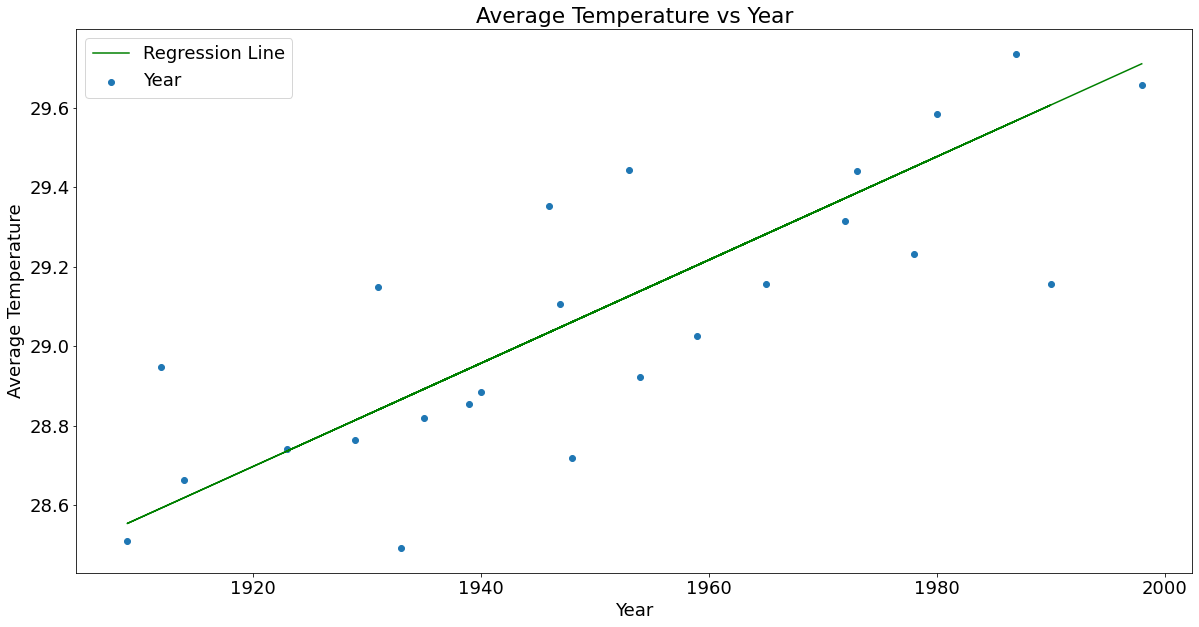

In [10]:
# C. Visualize simple regression model.
%matplotlib inline
plt.figure(figsize=(20,10))
plt.rc("font",size=18)
plt.title("Average Temperature vs Year")
plt.xlabel("Year")
plt.ylabel("Average Temperature")
plt.scatter(x_test,y_test)
plt.plot(x_test,reg.predict(np.array(x_test).reshape(-1,1)), color="g")
plt.legend(["Regression Line","Year"])